# Trajectory FMAX

In [3]:
%matplotlib inline
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
def unique_legend(ax, **kwargs):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), **kwargs)

../analyses/fmax/pils-v2-filtered-pinet-adam-v2-hoac-c1im-a0b0i32-rho1.1551/fmax.dat 2.750209093093872
../analyses/fmax/pils-v2-filtered-pinet-adam-v2-hoac-c1im-a16b16i16-rho1.1551/fmax.dat 3.2621898651123047
../analyses/fmax/pils-v2-filtered-pinet-adam-v2-hoac-c1im-a32b32i0-rho1.0753/fmax.dat 13.869028091430664
../analyses/fmax/pils-v2-filtered-pinet-adam-v2-hoac-c1im-a32b32i0-rho1.1551/fmax.dat 2.972304582595825
../analyses/fmax/pils-v2-filtered-pinet-adam-v2-hoac-c1im-a16b16i16-rho1.0753/fmax.dat 26.82481575012207
../analyses/fmax/pils-v2-filtered-pinet-adam-v2-hoac-c1im-a0b0i32-rho1.0753/fmax.dat 6.221117973327637
../analyses/fmax/pils-v2-filtered-pinet-ekf-v4-hoac-c1im-a32b32i0-rho1.0753/fmax.dat 16.37526512145996
../analyses/fmax/pils-v2-filtered-pinet-ekf-v4-hoac-c1im-a0b0i32-rho1.0753/fmax.dat 13.273237228393555
../analyses/fmax/pils-v2-filtered-pinet-ekf-v4-hoac-c1im-a32b32i0-rho1.1551/fmax.dat 14.670848846435547
../analyses/fmax/pils-v2-filtered-pinet-ekf-v4-hoac-c1im-a16b16i

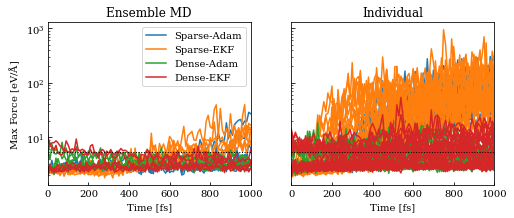

In [15]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=[8,3], sharey=True, sharex=True, facecolor="none")

for name, tag, color in [
    ('Sparse-Adam', 'pils-v2-filtered-pinet-adam-v2-hoac*', 'tab:green'),
    ('Sparse-EKF', 'pils-v2-filtered-pinet-ekf-v4-hoac*', 'tab:blue'),
    ('Dense-Adam', 'pils-v5-filtered-pinet-adam-v2-pre-hoac*', 'tab:orange'),
    ('Dense-EKF', 'pils-v5-filtered-pinet-ekf-v3-pre-hoac*', 'tab:red')
    ]:
    fnames = glob(f'../analyses/fmax/{tag}/fmax.dat')
    color = next(ax1._get_lines.prop_cycler)['color']
    for fname in fnames:
        fmax = np.loadtxt(fname)
        x = np.arange(len(fmax))*10
        print(fname,fmax[-1])
        ax1.plot(x, fmax, color=color, label=name)
   
ax1.set_title('Ensemble MD')
ax1.set_yscale('log')
ax1.set_xlim([0,1000])
ax1.set_xlabel('Time [fs]')
ax1.set_ylabel('Max Force [eV/$\AA$]')

for name, tag, color in [
    ('Sparse-Adam', 'pils-v2-filtered-pinet-adam-v2-*-hoac*', 'tab:green'),
    ('Sparse-EKF', 'pils-v2-filtered-pinet-ekf-v4-*-hoac*', 'tab:blue'),
    ('Dense-Adam', 'pils-v5-filtered-pinet-adam-v2-pre-*-hoac*', 'tab:orange'),
    ('Dense-EKF', 'pils-v5-filtered-pinet-ekf-v3-pre-*-hoac*', 'tab:red')
    ]:
    fnames = glob(f'../analyses/fmax/{tag}/fmax.dat')
    color = next(ax2._get_lines.prop_cycler)['color']
    print(len(fnames))
    for fname in fnames:
        fmax = np.loadtxt(fname)
        x = np.arange(len(fmax))*10
        ax2.plot(x, fmax, color=color, label=name)
 

        
ax2.set_title('Individual')
ax2.set_xlabel('Time [fs]')

ax1.plot([0,1000],[5.382321815120461]*2,'k:',lw=1)        
ax2.plot([0,1000],[5.382321815120461]*2,'k:',lw=1)     

unique_legend(ax1, frameon=True)
plt.savefig('initial-ensemble.png', facecolor='w')

# Write out Trajs

In [ ]:
from ase.io import read, write
traj = read('../trajs/ase/pils-v2-filtered-pinet-adam-v2-hoac-c1im-a0b0i32-rho1.1551/asemd.traj', index=':')
write('tmp.xyz', traj)
